In [52]:
import numpy as np
import networkx as nx
from treeApproximation import TreeApproximator
import matplotlib.pyplot as plt

import os
import tarfile
import gzip
import shutil
%matplotlib inline


from graphs import *

cwd = os.getcwd()
os.chdir("data")
files = os.listdir(os.getcwd())
for name in files:    
    if name.endswith(".txt.gz"):
          print("name is: " + name)
          with gzip.open(name, 'rb') as fileHandle:
              content = fileHandle.read()
os.chdir(cwd)


name is: ca-HepTh.txt.gz
name is: email-Eu-core-department-labels.txt.gz
name is: email-Eu-core.txt.gz
name is: roadNet-CA.txt.gz


In [48]:
class T:
    def __init__(self, G):
        nodes = G.nodes()
        edges = G.edges()
        n = len(nodes)
        m = len(edges)
        self.table = self._create_table(n, edges)
        
    
    def _create_table(self, n, edges):
        table = np.zeros((n,n))
        for edge, _ in edges.items():
            source_id = edge[0]
            target_id = edge[1]
            
            table[source_id][target_id] = 1
            table[target_id][source_id] = 1   
        return table
    
    def produce_spanner(self):
        h = nx.from_numpy_matrix(self.table)
        return h
    
    def __str__(self):
        return str(self.table)    

        

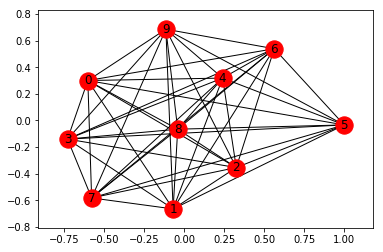

In [49]:
m = np.random.rand(10,10)
g = nx.from_numpy_matrix(m)
nx.draw_networkx(g)
t = T(g)


In [50]:
class Graph_Spanner:
    
    def __init__(self, graph, alpha, beta, spanner_func="greedy"):
        self.g = graph
        self.alpha = alpha
        self.beta = beta 
        
        self.h = None
    
    def distance_g(self, u, v):
        return nx.shortest_path_length(self.g, u, v)
    
    def distance_h(self, u, v):
        return nx.shortest_path_length(self.h, u, v)
    
    def greedy_spanner(k):
        graph = self.g
        n = g.number_of_nodes()
        table = np.zeros((n, n))
        for i in g.nodes.items():
            for j in g.nodes.items():            
                if self.distance_g(i, j) > 2 * k - 1:
                    table[i][j] = 1
                    table[j][i] = 1
        h = nx.from_numpy_matrix(table)
        return h
    
    def m_H(self):
        """
        m(H): size (# of edges) of spanner graph. 
        Lower is better. Performance metric. Returns an int. 
        """
        return self.h.number_of_edges()
        
        